In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data from file
file_path = "./household_waste.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head(20)


,Region,M49 code,Country,Household estimate (kg/capita/year),Household estimate (tonnes/year),Confidence in estimate
0,Australia and New Zealand,36,Australia,102,"2,563,110",High confidence
1,Australia and New Zealand,554,New Zealand,61,"291,769",High confidence
2,Central Asia,398,Kazakhstan,76,"1,404,584",Very Low Confidence
3,Central Asia,417,Kyrgyzstan,91,"583,951",Very Low Confidence
4,Central Asia,762,Tajikistan,97,"906,209",Very Low Confidence
5,Central Asia,795,Turkmenistan,76,"449,895",Very Low Confidence
6,Central Asi?,860,Uzbekistan,91,"3,001,868",Very Low Confidence
7,Eastern Asia,156,China,64,"91,646,213",Medium confidence
8,Eastern Asia,344,"China, Hong Kong SAR",71,"530,985",Very Low Confidence
9,Eastern Asia,446,"China, Macao SAR",71,"45,728",Very Low Confidence


In [2]:

# Check the data type of the column
print(data['Household estimate (tonnes/year)'].dtype)

object


In [3]:

# Remove commas from the values in 'Household estimate (tonnes/year)' column and convert to numeric
data['Household estimate (tonnes/year)'] = pd.to_numeric(data['Household estimate (tonnes/year)'].apply(lambda x: re.sub(r',', '', str(x))), errors='coerce').fillna(0)


In [4]:
# Display the first few rows of the 'Household estimate (tonnes/year)' column
print(data['Household estimate (tonnes/year)'].head())

0    2563110
1     291769
2    1404584
3     583951
4     906209
Name: Household estimate (tonnes/year), dtype: int64


In [5]:
# Group data by 'Region' and calculate statistical summaries
region_statistics = data.groupby('Region').agg({
    'Household estimate (tonnes/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics)


                             Region Household estimate (tonnes/year)  \
                                                                mean   
0         Australia and New Zealand                     1.427440e+06   
1                      Central Asi?                     3.001868e+06   
2                      Central Asia                     8.361598e+05   
3                      Eastern Asia                     1.519447e+07   
4                    Eastern Europe                     1.515513e+06   
5   Latin America and the Caribbean                     1.124207e+06   
6                         Melanesia                     1.953330e+05   
7                        Micronesia                     6.492286e+03   
8                   Northern Africa                     3.685824e+06   
9                  Northern America                     5.576764e+06   
10                  Northern Europe                     6.691098e+05   
11                        Polynesia                     9.975600

In [6]:
# Check the data type of the 'Household estimate (kg/capita/year)' column
print(data['Household estimate (kg/capita/year)'].dtype)

int64


In [7]:
# Display unique values in the "Household estimate (kg/capita/year)" column
print(data['Household estimate (kg/capita/year)'].unique())


[102  61  76  91  97  64  71  81  78  68  70  94  56  33  74  72  53  80
  60  83  79  59  65  55  77  86  82  50  84 142  67 129  34 100  92 103
  99  93 189 164  40 119 132  95 101 120 105 104  39  85  75  89]


In [8]:
# Convert the "Household estimate (kg/capita/year)" column to numeric format, ignoring errors
data['Household estimate (kg/capita/year)'] = pd.to_numeric(data['Household estimate (kg/capita/year)'], errors='coerce')


In [9]:
# Group data by 'Region' and calculate statistical summaries for 'Household estimate (kg/capita/year)'
region_statistics_kg_per_capita = data.groupby('Region').agg({
    'Household estimate (kg/capita/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics_kg_per_capita)


                             Region Household estimate (kg/capita/year)  \
                                                                   mean   
0         Australia and New Zealand                           81.500000   
1                      Central Asi?                           91.000000   
2                      Central Asia                           85.000000   
3                      Eastern Asia                           71.428571   
4                    Eastern Europe                           68.100000   
5   Latin America and the Caribbean                           73.571429   
6                         Melanesia                           85.600000   
7                        Micronesia                           82.000000   
8                   Northern Africa                           89.500000   
9                  Northern America                           71.500000   
10                  Northern Europe                           74.666667   
11                       

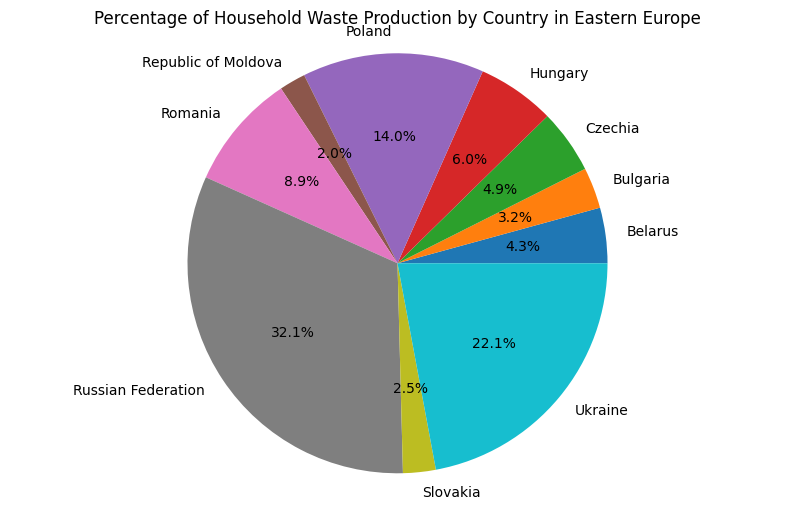

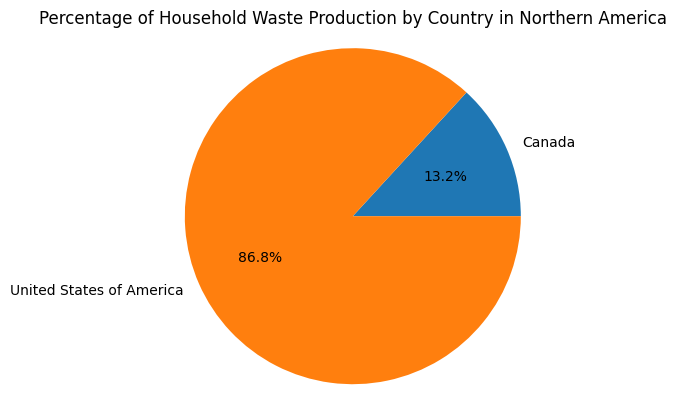

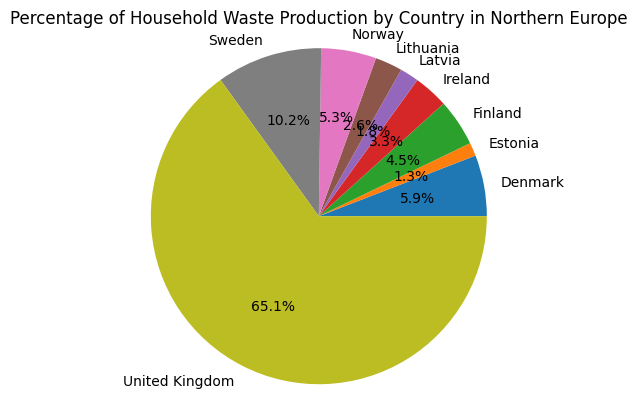

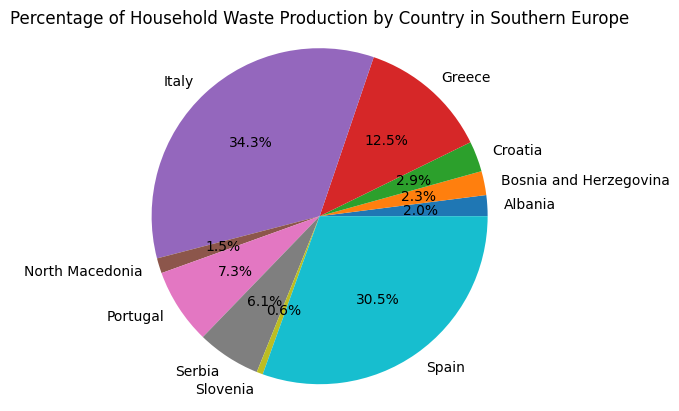

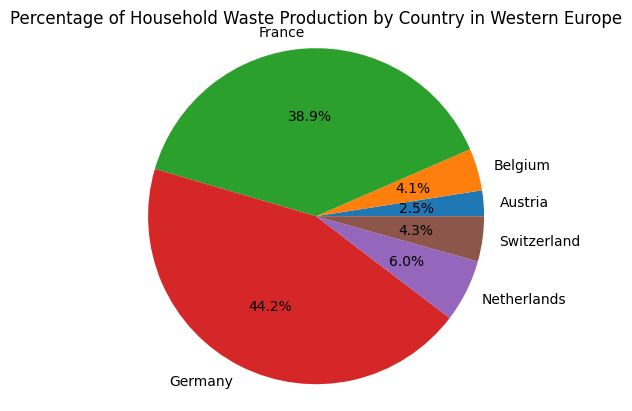

In [10]:


# Group the data by regions and countries and calculate the total amount of waste production for each country within the region
region_country_grouped = data.groupby(['Region', 'Country'])['Household estimate (tonnes/year)'].sum().reset_index()

# Calculate the percentage of waste production by each country within the region
region_country_grouped['Percentage'] = region_country_grouped.groupby('Region')['Household estimate (tonnes/year)'].transform(lambda x: (x / x.sum()) * 100)

# Filtering data to select specific regions
selected_regions = ['Northern America', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe']  # Replace this with the actual names of the regions you need
filtered_data = region_country_grouped[region_country_grouped['Region'].isin(selected_regions)]

# Filtering countries with percentage less than 0.4%
filtered_data = filtered_data[filtered_data['Percentage'] > 0.5]

# Plotting charts for selected regions with updated data and reduced font size
plt.figure(figsize=(10, 6))
for region, region_data in filtered_data.groupby('Region'):
    plt.pie(region_data['Percentage'], labels=region_data['Country'], autopct='%1.1f%%', textprops={'fontsize': 10})
    plt.title(f'Percentage of Household Waste Production by Country in {region}', fontsize=12)
    plt.axis('equal')  # Ensuring a circular format for the pie chart
    plt.show()


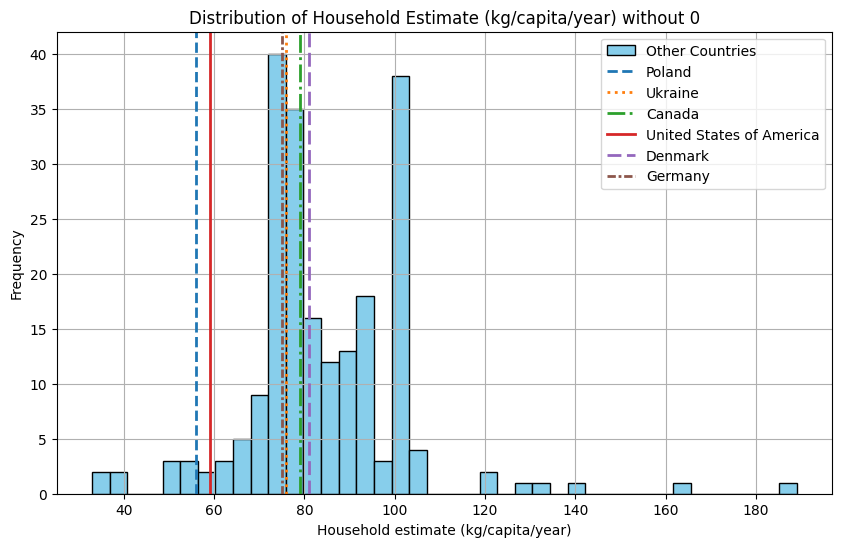

In [13]:
# Filter out values equal to 0
non_zero_values = data[data['Household estimate (kg/capita/year)'] != 0]['Household estimate (kg/capita/year)']

# Select values for Denmark, USA, Canada, Poland, Ukraine, and Germany
countries = ['Denmark', 'United States of America', 'Canada', 'Poland', 'Ukraine', 'Germany']
values = data[data['Country'].isin(countries)][['Country', 'Household estimate (kg/capita/year)']]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_values, bins=40, color='skyblue', edgecolor='black', label='Other Countries')

# Set vertical lines for each country
line_styles = ['dashed', 'dotted', 'dashdot', 'solid', (0, (5, 2)), (0, (3, 1, 1, 1))]
for idx, (country, country_value) in enumerate(values.values):
    plt.axvline(country_value, color=f'C{idx}', linestyle=line_styles[idx], linewidth=2, label=country)

# Title and axis labels
plt.title('Distribution of Household Estimate (kg/capita/year) without 0')
plt.xlabel('Household estimate (kg/capita/year)')
plt.ylabel('Frequency')
plt.legend()  # Add labels to lines
plt.grid(True)

# Display the plot
plt.show()



Based on the analyzed information, it can be inferred that Canada and Denmark exhibit high rates of household waste recycling, indicating a more advanced system for the collection and processing of such waste. This achievement may result from effective waste sorting and recycling programs, as well as a responsible attitude of the population towards environmental issues. The high waste management standards in these countries may lead to the absence of restrictions on household waste types, as they successfully implement sorting and recycling practices.


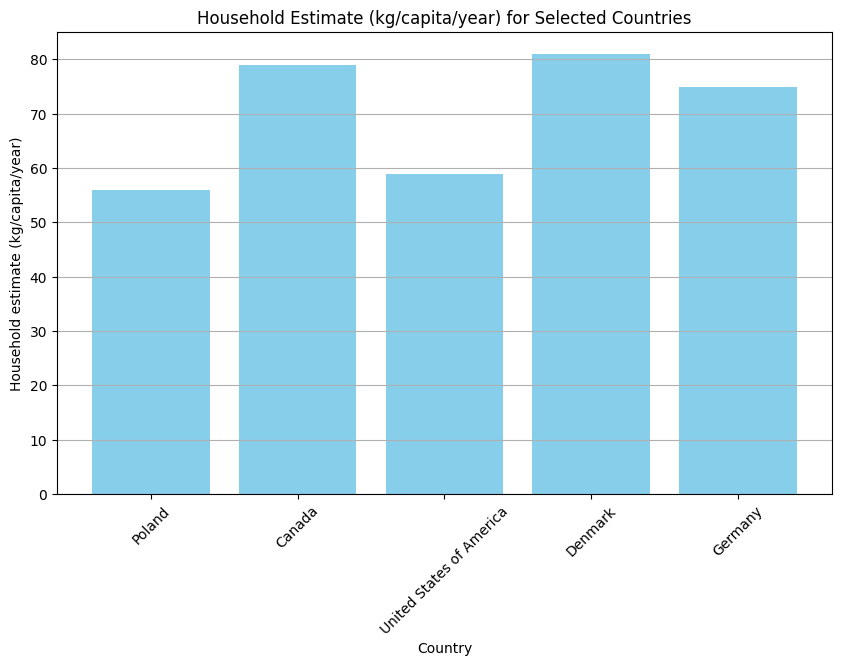

In [14]:

# Selecting data for the specified countries
selected_countries = data[data['Country'].isin(['Denmark', 'Germany', 'United States of America', 'Canada', 'Poland'])]

# Building a bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_countries['Country'], selected_countries['Household estimate (kg/capita/year)'], color='skyblue')
plt.title('Household Estimate (kg/capita/year) for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Household estimate (kg/capita/year)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
